In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.preprocessing.text as tfkpt
from tensorflow.keras.preprocessing.text import Tokenizer
import csv

In [2]:
anime_genre_train = pd.read_csv('./assets/anime_genre.csv')

#### Above read data-anime for to train genre

In [3]:
print(f"Data Shape: {anime_genre_train}")

Data Shape:        anime_id                                  title  \
0         11013                          Inu x Boku SS   
1          2104                       Seto no Hanayome   
2          5262                     Shugo Chara!! Doki   
3           721                          Princess Tutu   
4         12365                    Bakuman. 3rd Season   
...         ...                                    ...   
14469     26089             Gutchonpa Omoshiro Hanashi   
14470     21525                   Geba Geba Shou Time!   
14471     37897            Godzilla: Hoshi wo Kuu Mono   
14472     34193  Nippon Mukashibanashi: Sannen Netarou   
14473     37908             Senjou no Valkyria Special   

                   title_english                  title_japanese  \
0      Inu X Boku Secret Service                          妖狐×僕SS   
1          My Bride is a Mermaid                           瀬戸の花嫁   
2             Shugo Chara!! Doki                     しゅごキャラ！！どきっ   
3                  

In [4]:
print(anime_genre_train.columns)

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')


In [5]:
ranked_anime_genre = anime_genre_train[['genre', 'score']].sort_values(by='score')

In [6]:
ranked_anime_genre

,genre,score
14286,"Adventure, Fantasy, Kids",0.00
5344,Action,0.00
11127,"Adventure, Sci-Fi",0.00
1702,"Action, Adventure, Fantasy, Shounen, Super Power",0.00
6215,"Action, Adventure, Supernatural",0.00
...,...,...
14399,Hentai,9.52
14463,"Drama, Kids",10.00
548,Kids,10.00
14403,Kids,10.00


In [7]:
ranked_anime_genre['score'].median()

6.37

In [8]:
ranked_anime_genre['score'].mode()

0    0.0
dtype: float64

In [9]:
ranked_anime_genre['score'].mean()

6.144179217907974

#### Mean and Median Score is very close to lowest score so we use regression 

In [10]:
regression_anime_genre = ranked_anime_genre['score'].value_counts()

In [11]:
ra_genre = ranked_anime_genre.groupby(['score'],as_index=False).count()
ra_genre

,score,genre
0,0.00,342
1,1.00,11
2,1.25,0
3,1.33,1
4,1.50,1
...,...,...
625,9.20,1
626,9.25,1
627,9.50,2
628,9.52,1


#### math calculation of positive, negative and natural range

In [12]:
range = 1000 - 0
range

1000

In [13]:
round(range/3)

333

#### Math calculation says use 0.59 for each situation.
#### We check it as below analysis

In [14]:
ra_genre = ra_genre.rename(columns={'score': 'points', 'genre': 'count'})

In [15]:
ra_genre

,points,count
0,0.00,342
1,1.00,11
2,1.25,0
3,1.33,1
4,1.50,1
...,...,...
625,9.20,1
626,9.25,1
627,9.50,2
628,9.52,1


In [16]:
X = ra_genre['points'].values
y = ra_genre['count'].values
X

array([ 0.  ,  1.  ,  1.25,  1.33,  1.5 ,  1.67,  1.75,  1.88,  1.9 ,
        2.  ,  2.08,  2.25,  2.27,  2.33,  2.38,  2.4 ,  2.44,  2.5 ,
        2.52,  2.55,  2.57,  2.6 ,  2.61,  2.63,  2.64,  2.65,  2.66,
        2.67,  2.71,  2.72,  2.75,  2.78,  2.8 ,  2.82,  2.85,  2.86,
        2.88,  2.89,  2.9 ,  2.91,  2.92,  2.95,  3.  ,  3.04,  3.07,
        3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,
        3.17,  3.19,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,
        3.27,  3.29,  3.3 ,  3.31,  3.33,  3.34,  3.35,  3.36,  3.38,
        3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,
        3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,
        3.58,  3.59,  3.6 ,  3.61,  3.62,  3.63,  3.64,  3.65,  3.66,
        3.67,  3.68,  3.69,  3.7 ,  3.71,  3.72,  3.73,  3.74,  3.75,
        3.76,  3.77,  3.78,  3.79,  3.8 ,  3.81,  3.82,  3.83,  3.85,
        3.86,  3.87,  3.88,  3.89,  3.9 ,  3.91,  3.92,  3.93,  3.94,
        3.95,  3.96,

In [17]:
X=X.reshape(-1,1)
X

array([[ 0.  ],
       [ 1.  ],
       [ 1.25],
       [ 1.33],
       [ 1.5 ],
       [ 1.67],
       [ 1.75],
       [ 1.88],
       [ 1.9 ],
       [ 2.  ],
       [ 2.08],
       [ 2.25],
       [ 2.27],
       [ 2.33],
       [ 2.38],
       [ 2.4 ],
       [ 2.44],
       [ 2.5 ],
       [ 2.52],
       [ 2.55],
       [ 2.57],
       [ 2.6 ],
       [ 2.61],
       [ 2.63],
       [ 2.64],
       [ 2.65],
       [ 2.66],
       [ 2.67],
       [ 2.71],
       [ 2.72],
       [ 2.75],
       [ 2.78],
       [ 2.8 ],
       [ 2.82],
       [ 2.85],
       [ 2.86],
       [ 2.88],
       [ 2.89],
       [ 2.9 ],
       [ 2.91],
       [ 2.92],
       [ 2.95],
       [ 3.  ],
       [ 3.04],
       [ 3.07],
       [ 3.08],
       [ 3.09],
       [ 3.1 ],
       [ 3.11],
       [ 3.12],
       [ 3.13],
       [ 3.14],
       [ 3.15],
       [ 3.16],
       [ 3.17],
       [ 3.19],
       [ 3.2 ],
       [ 3.21],
       [ 3.22],
       [ 3.23],
       [ 3.24],
       [ 3.25],
       [

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=10)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (504, 1)
y_train shape (504,)
X_test shape (126, 1)
y_test shape (126,)
[18 35 56 14  1  3  6 25 30 61 11 12  1  1 59 43 56  1 25 65 54 26  5 62
 46 28 43 51 17 28 21 25 52 28 11  2 25  3 54 41 25 60  1 31 23  8 41  5
 12  1 29 40 36  9  1 44  1  6  1 32 25 14  9 37 47 11 26 47 41  7 37 28
  1 49 20 63  4 14  5 50  1  2 14 41 10 20 41  1  1 60 24 55 51  1  1 32
  1 38 38 27  6  5  3 40 10  8 28 41  2 39 31  4 16 14 15 26 45  1  7  1
  2 26 41 33  5  3]


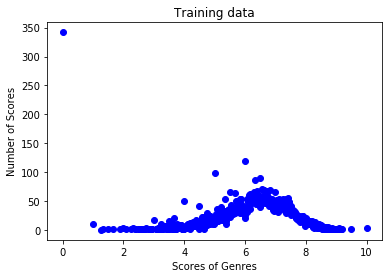

In [20]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Scores of Genres' )
plt.ylabel('Number of Scores')
plt.title('Training data')
plt.show()

In [21]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 1.46 %
Test accuracy 10.77 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

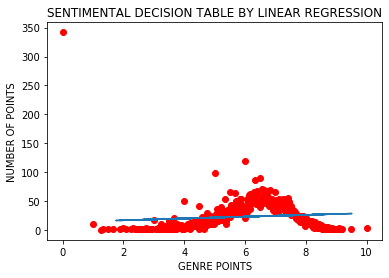

In [22]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("GENRE POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY LINEAR REGRESSION")
plt.plot

#### We check it with Polynominal Regression

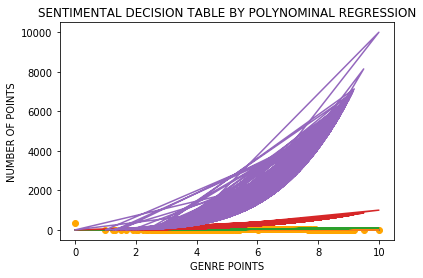

In [23]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel("GENRE POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY POLYNOMINAL REGRESSION")
plt.show()

In [24]:
def create_sentiment(int):
    if int >=0 and int<4.50:
        return 0
    if int>=4.50 and int<7.75:
        return 1
    if int>=7.75 and int<10.01:
        return 2

### Above the decision of breakpoints are given 

In [25]:
ranked_anime_genre['sentiment'] = ranked_anime_genre['score'].apply(create_sentiment)

In [31]:
ranked_anime_genre

,genre,score,sentiment
14286,"Adventure, Fantasy, Kids",0.00,0
5344,Action,0.00,0
11127,"Adventure, Sci-Fi",0.00,0
1702,"Action, Adventure, Fantasy, Shounen, Super Power",0.00,0
6215,"Action, Adventure, Supernatural",0.00,0
...,...,...,...
14399,Hentai,9.52,2
14463,"Drama, Kids",10.00,2
548,Kids,10.00,2
14403,Kids,10.00,2


In [32]:
def clean_comas(input):
    input = str(input)
    return input.replace(',', ';') 

In [33]:
ranked_anime_genre['genre'] = ranked_anime_genre['genre'].apply(clean_comas)

In [35]:
ranked_anime_genre

,genre,score,sentiment
14286,Adventure; Fantasy; Kids,0.00,0
5344,Action,0.00,0
11127,Adventure; Sci-Fi,0.00,0
1702,Action; Adventure; Fantasy; Shounen; Super Power,0.00,0
6215,Action; Adventure; Supernatural,0.00,0
...,...,...,...
14399,Hentai,9.52,2
14463,Drama; Kids,10.00,2
548,Kids,10.00,2
14403,Kids,10.00,2


In [37]:
ranked_anime_genre.to_csv('ranked_anime_genre.csv')

In [38]:
genre_df = pd.read_csv('ranked_anime_genre.csv')

In [46]:
genre_df

,Unnamed: 0,genre,score,sentiment
0,14286,Adventure; Fantasy; Kids,0.00,0
1,5344,Action,0.00,0
2,11127,Adventure; Sci-Fi,0.00,0
3,1702,Action; Adventure; Fantasy; Shounen; Super Power,0.00,0
4,6215,Action; Adventure; Supernatural,0.00,0
...,...,...,...,...
14469,14399,Hentai,9.52,2
14470,14463,Drama; Kids,10.00,2
14471,548,Kids,10.00,2
14472,14403,Kids,10.00,2


In [47]:
genre_df.columns=['Unnamed: 0', 'genre' , 'score' , 'sentiment']
genre_training_df = genre_df[['genre', 'sentiment']].dropna()
genre_training_df.sample(5)

,genre,sentiment
11279,Action; Adventure; Comedy; Mecha; Shounen; Space,1
3859,Action; Music; Sci-Fi,1
390,Romance,0
2433,Fantasy,1
2224,Fantasy; Kids,1


In [48]:
genre_y = genre_training_df.sentiment
print(genre_y)

0        0
1        0
2        0
3        0
4        0
        ..
14469    2
14470    2
14471    2
14472    2
14473    2
Name: sentiment, Length: 14410, dtype: int64


In [49]:
genre_x = genre_training_df.genre
print(genre_x)

0                                Adventure; Fantasy; Kids
1                                                  Action
2                                       Adventure; Sci-Fi
3        Action; Adventure; Fantasy; Shounen; Super Power
4                         Action; Adventure; Supernatural
                               ...                       
14469                                              Hentai
14470                                         Drama; Kids
14471                                                Kids
14472                                                Kids
14473                                                Kids
Name: genre, Length: 14410, dtype: object


In [50]:
genre_training_df.describe()

,sentiment
count,14410.000000
mean,0.988897
std,0.397806
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [52]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(genre_x)

In [53]:
genre_x = tokenizer.texts_to_sequences(genre_x)

In [54]:
genre_x = tokenizer.sequences_to_matrix(genre_x)
genre_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
print(type(genre_x))

<class 'numpy.ndarray'>


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
import json

In [57]:
print ("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [58]:
genre_y = keras.utils.to_categorical(genre_y,3)

In [59]:
genre_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

#### x and y axis created for machine learning, now it is time for layers between input and output

In [90]:
model = Sequential()

#### 1st layer act Sigmoid drop 1 at 10%

In [91]:
model.add(Dense(955, activation='sigmoid'))
model.add(Dropout(0.1))

#### 2nd layer act Rectified Linear Drop 1 at 20%

In [92]:
model.add(Dense(555, activation = 'relu'))
model.add(Dropout(0.2))

#### 3rd layer act Linear Drop 1 at 40%

In [93]:
model.add(Dense(55, activation = 'tanh'))
model.add(Dropout(0.5))

#### 4th layer act softsign no drop

In [94]:
model.add(Dense(33, activation = 'softsign'))


#### 5th layer act softmax no drop

In [95]:
model.add(Dense(3, activation = 'softmax'))

#### Compile the model

In [96]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
model.fit(
    genre_x, genre_y,
    batch_size=35,
    epochs=7,
    verbose=1,
    validation_split=0.2)

Train on 11528 samples, validate on 2882 samples
Epoch 1/7
11528/11528 [==============================] - 2s 211us/sample - loss: 0.3554 - accuracy: 0.8932 - val_loss: 2.6268 - val_accuracy: 0.6319
Epoch 2/7
11528/11528 [==============================] - 2s 167us/sample - loss: 0.3419 - accuracy: 0.8941 - val_loss: 3.0667 - val_accuracy: 0.6319
Epoch 3/7
11528/11528 [==============================] - 2s 170us/sample - loss: 0.3401 - accuracy: 0.8941 - val_loss: 3.3142 - val_accuracy: 0.6319
Epoch 4/7
11528/11528 [==============================] - 2s 170us/sample - loss: 0.3393 - accuracy: 0.8941 - val_loss: 3.4902 - val_accuracy: 0.6319
Epoch 5/7
11528/11528 [==============================] - 2s 176us/sample - loss: 0.3399 - accuracy: 0.8941 - val_loss: 3.6368 - val_accuracy: 0.6319
Epoch 6/7
11528/11528 [==============================] - 2s 171us/sample - loss: 0.3389 - accuracy: 0.8941 - val_loss: 3.7156 - val_accuracy: 0.6319
Epoch 7/7
11528/11528 [==============================] - 

In [98]:
anime_genre_model = model.to_json()
with open('anime_genre_model_1.json', 'w') as json_file:
    json_file.write(anime_genre_model)
model.save_weights('anime_genre_model_1.h5')

In [100]:
anime_genre_dict_1 = tokenizer.word_index
with open('anime_genre_dict_1.json', 'w') as d:
    json.dump(anime_genre_dict_1, d)